In [1]:
import pandas as pd

try:
    df = pd.read_csv("Elon_musk.csv", encoding='latin-1')  # Replace 'latin-1' with other encoding standards
except UnicodeDecodeError:
    print("Error with specified encoding. Trying alternative encodings...")
    # Try other encodings like 'cp1252' or 'ISO-8859-1' if 'latin-1' fails

In [2]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    # Remove Retweets
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # Remove Mentions
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    # Remove URLs
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    # Remove special characters
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Tokenize
    words = word_tokenize(tweet)
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['cleaned_tweet'] = df['Text'].apply(clean_tweet)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df.head()

,Unnamed: 0,Text,cleaned_tweet
0,1,@kunalb11 Im an alien,im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,aacarmack ray tracing cyberpunk hdr nextlevel ...
2,3,@joerogan @Spotify Great interview!,great interview
3,4,@gtera27 Doge is underestimated,doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china amazing execution ...


In [5]:
df.tail()

,Unnamed: 0,Text,cleaned_tweet
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",true sounds surreal negative propaganda still ...
1995,1996,@PPathole Make sure to read ur terms &amp; con...,make sure read ur terms amp conditions clickin...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb dumber ufuf
1998,1999,Progress update August 28,progress update august


In [6]:
df.drop(columns=['Unnamed: 0', 'Text'], inplace=True)

In [7]:
df.head()

,cleaned_tweet
0,im alien
1,aacarmack ray tracing cyberpunk hdr nextlevel ...
2,great interview
3,doge underestimated
4,congratulations tesla china amazing execution ...


In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['cleaned_tweet'] = df['cleaned_tweet'].apply(lemmatize_text)


In [10]:
df = df[df['cleaned_tweet'].str.strip().astype(bool)]

In [11]:
df.drop_duplicates(subset=['cleaned_tweet'], keep='first', inplace=True)

<ipython-input-11-5088cd339a13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['cleaned_tweet'], keep='first', inplace=True)


In [12]:
df.to_csv('cleaned_elon_tweets.csv', index=False)

In [13]:
import pandas as pd
df = pd.read_csv('cleaned_elon_tweets.csv')

In [14]:
df.head()

,cleaned_tweet
0,im alien
1,aacarmack ray tracing cyberpunk hdr nextlevel ...
2,great interview
3,doge underestimated
4,congratulation tesla china amazing execution l...


In [15]:
import pandas as pd
from textblob import TextBlob

# Load the cleaned dataset
df = pd.read_csv('cleaned_elon_tweets.csv')

# Assuming the dataset has only one column named 'cleaned_tweet'
tweets = df['cleaned_tweet']

# Function to calculate sentiment using TextBlob
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Assign sentiment labels based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis function to each tweet
df['sentiment'] = tweets.apply(get_sentiment)

# Display the dataset with sentiment labels
print(df)


                                          cleaned_tweet sentiment
0                                              im alien  negative
1     aacarmack ray tracing cyberpunk hdr nextlevel ...   neutral
2                                       great interview  positive
3                                   doge underestimated   neutral
4     congratulation tesla china amazing execution l...  positive
...                                                 ...       ...
1721  true sound surreal negative propaganda still a...  positive
1722  make sure read ur term amp condition clicking ...  positive
1723                                     samwise gamgee   neutral
1724                             altho dumb dumber ufuf  negative
1725                             progress update august   neutral

[1726 rows x 2 columns]


In [16]:
nltk.download('vader_lexicon')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the cleaned dataset
df = pd.read_csv('cleaned_elon_tweets.csv')

# Assuming the dataset has only one column named 'cleaned_tweet'
tweets = df['cleaned_tweet']

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment using VADER
def get_sentiment(tweet):
    # Analyze sentiment of the tweet
    sentiment_scores = sid.polarity_scores(tweet)
    # Determine sentiment label based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis function to each tweet
df['sentiment'] = tweets.apply(get_sentiment)

# Display the dataset with sentiment labels
print(df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          cleaned_tweet sentiment
0                                              im alien   neutral
1     aacarmack ray tracing cyberpunk hdr nextlevel ...   neutral
2                                       great interview  positive
3                                   doge underestimated  negative
4     congratulation tesla china amazing execution l...  positive
...                                                 ...       ...
1721  true sound surreal negative propaganda still a...   neutral
1722  make sure read ur term amp condition clicking ...  positive
1723                                     samwise gamgee   neutral
1724                             altho dumb dumber ufuf  negative
1725                             progress update august  positive

[1726 rows x 2 columns]


In [17]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the cleaned dataset
df = pd.read_csv('cleaned_elon_tweets.csv')

# Assuming the dataset has only one column named 'cleaned_tweet'
tweets = df['cleaned_tweet']

# Function to perform sentiment analysis using TextBlob
def get_sentiment_textblob(tweet):
    analysis = TextBlob(tweet)
    # Assign sentiment labels based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Function to perform sentiment analysis using NLTK's VADER
def get_sentiment_vader(tweet):
    sid = SentimentIntensityAnalyzer()
    # Analyze sentiment of the tweet
    sentiment_scores = sid.polarity_scores(tweet)
    # Determine sentiment label based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis function to each tweet using TextBlob
df['sentiment_textblob'] = tweets.apply(get_sentiment_textblob)

# Apply sentiment analysis function to each tweet using NLTK's VADER
df['sentiment_vader'] = tweets.apply(get_sentiment_vader)

# Display the dataset with sentiment labels from both TextBlob and NLTK's VADER
print(df)

                                          cleaned_tweet sentiment_textblob  \
0                                              im alien           negative   
1     aacarmack ray tracing cyberpunk hdr nextlevel ...            neutral   
2                                       great interview           positive   
3                                   doge underestimated            neutral   
4     congratulation tesla china amazing execution l...           positive   
...                                                 ...                ...   
1721  true sound surreal negative propaganda still a...           positive   
1722  make sure read ur term amp condition clicking ...           positive   
1723                                     samwise gamgee            neutral   
1724                             altho dumb dumber ufuf           negative   
1725                             progress update august            neutral   

     sentiment_vader  
0            neutral  
1            neut

In [18]:
df

,cleaned_tweet,sentiment_textblob,sentiment_vader
0,im alien,negative,neutral
1,aacarmack ray tracing cyberpunk hdr nextlevel ...,neutral,neutral
2,great interview,positive,positive
3,doge underestimated,neutral,negative
4,congratulation tesla china amazing execution l...,positive,positive
...,...,...,...
1721,true sound surreal negative propaganda still a...,positive,neutral
1722,make sure read ur term amp condition clicking ...,positive,positive
1723,samwise gamgee,neutral,neutral
1724,altho dumb dumber ufuf,negative,negative


In [19]:
import pandas as pd
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the cleaned dataset
#df = pd.read_csv('cleaned_elon_tweets.csv')

# Assuming the dataset has only one column named 'cleaned_tweet'
tweets = df['cleaned_tweet']

# Function to perform sentiment analysis using TextBlob
def get_sentiment_textblob(tweet):
    analysis = TextBlob(tweet)
    # Assign sentiment labels based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Function to perform sentiment analysis using NLTK's VADER
def get_sentiment_vader(tweet):
    sid = SentimentIntensityAnalyzer()
    # Analyze sentiment of the tweet
    sentiment_scores = sid.polarity_scores(tweet)
    # Determine sentiment label based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis function to each tweet using TextBlob
df['sentiment_textblob'] = tweets.apply(get_sentiment_textblob)

# Apply sentiment analysis function to each tweet using NLTK's VADER
df['sentiment_vader'] = tweets.apply(get_sentiment_vader)

# Compare the sentiment labels from TextBlob and NLTK's VADER and count matches
matches = (df['sentiment_textblob'] == df['sentiment_vader']).sum()

# Calculate the total number of tweets
total_tweets = len(df)

# Calculate the percentage of matches
percentage_matches = (matches / total_tweets) * 100

print(f"Number of matches: {matches}")
print(f"Total number of tweets: {total_tweets}")
print(f"Percentage of matches: {percentage_matches:.2f}%")


Number of matches: 1120
Total number of tweets: 1726
Percentage of matches: 64.89%


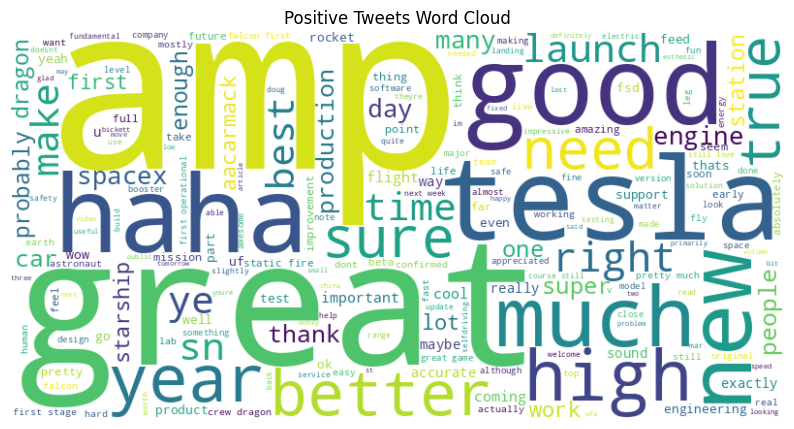

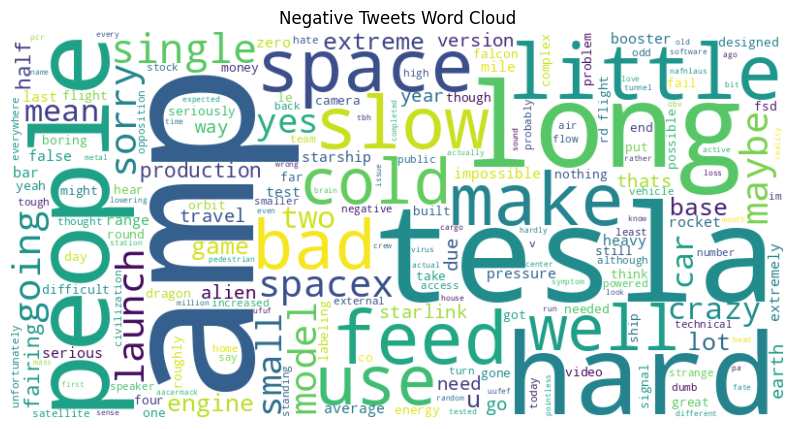

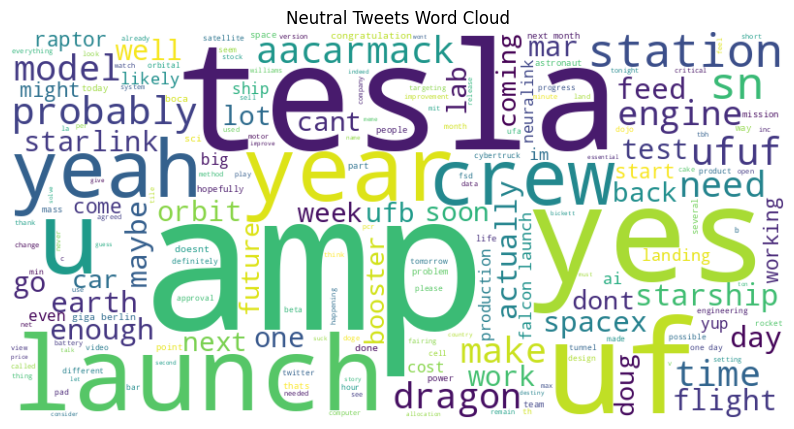

In [20]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the cleaned dataset
#df = pd.read_csv('cleaned_elon_tweets.csv')

# Assuming the dataset has columns for sentiment labels generated by different methods
# For example, 'sentiment_textblob', 'sentiment_vader', 'sentiment_spacy'
# Modify the column names accordingly based on the sentiment analysis methods used
positive_tweets = df[df['sentiment_textblob'] == 'positive']['cleaned_tweet']
negative_tweets = df[df['sentiment_textblob'] == 'negative']['cleaned_tweet']
neutral_tweets = df[df['sentiment_textblob'] == 'neutral']['cleaned_tweet']

# Function to generate word cloud
def generate_wordcloud(tweets, title):
    # Concatenate all tweets into a single string
    text = ' '.join(tweets)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
generate_wordcloud(positive_tweets, 'Positive Tweets Word Cloud')
print('\n')
generate_wordcloud(negative_tweets, 'Negative Tweets Word Cloud')
print('\n')
generate_wordcloud(neutral_tweets, 'Neutral Tweets Word Cloud')


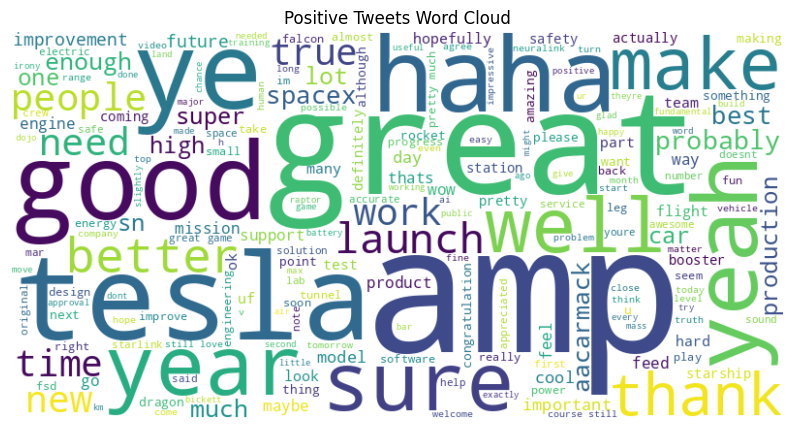

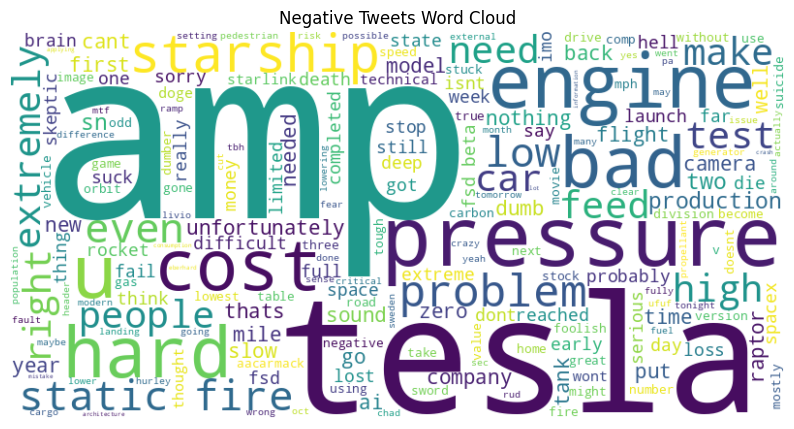

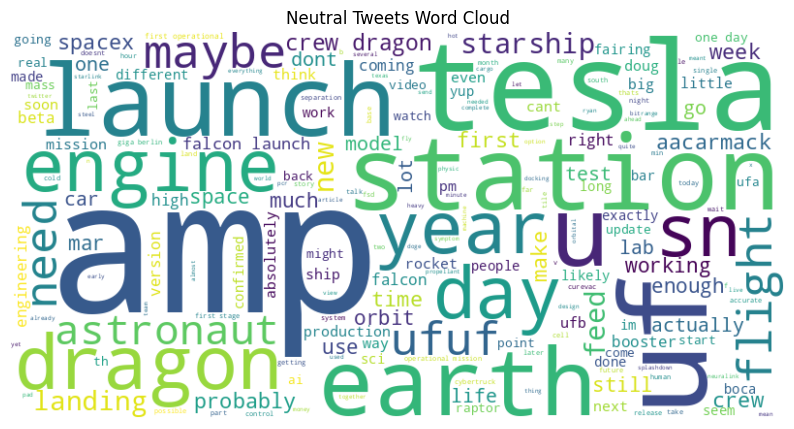

In [21]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the cleaned dataset
#df = pd.read_csv('cleaned_elon_tweets.csv')

# Assuming the dataset has columns for sentiment labels generated by different methods
# For example, 'sentiment_textblob', 'sentiment_vader', 'sentiment_spacy'
# Modify the column names accordingly based on the sentiment analysis methods used
positive_tweets = df[df['sentiment_vader'] == 'positive']['cleaned_tweet']
negative_tweets = df[df['sentiment_vader'] == 'negative']['cleaned_tweet']
neutral_tweets = df[df['sentiment_vader'] == 'neutral']['cleaned_tweet']

# Function to generate word cloud
def generate_wordcloud(tweets, title):
    # Concatenate all tweets into a single string
    text = ' '.join(tweets)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
generate_wordcloud(positive_tweets, 'Positive Tweets Word Cloud')
print('\n')
generate_wordcloud(negative_tweets, 'Negative Tweets Word Cloud')
print('\n')
generate_wordcloud(neutral_tweets, 'Neutral Tweets Word Cloud')
